In [1]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer, KNNImputer

# GPT
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Step 1: Read in the data

In [2]:
# Load the datasets
df = pd.read_csv("data/data.csv", index_col = 0)
df.head()

C:\Users\AndrewsMatthewHaines\AppData\Local\Temp\ipykernel_28716\2013055878.py:2: DtypeWarning: Columns (56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/data.csv", index_col = 0)


,web-scraper-order,web-scraper-start-url,course,comments,year,term,course_title,course_number1,department1,course_number2,department2,name_key1,instructor_first_name,instructor_last_name,enrollment,responses,number_of_comments,Course_Overall_Rating,Course_Materials_Rating,Course_Assignments_Rating,Course_Feedback_Rating,Course_Section_Rating,Course_Workload_Rating,Course_Goals_Rating,Course_Recommend_Rating,...,Course_Recommend_Respondents,Course_Money_Respondents,Instructor_Return_Respondents,Instructor_Feedback_Respondents,Instructor_Participation_Respondents,Instructor_Enthusiasm_Respondents,Instructor_Accessible_Respondents,Instructor_Lectures_Respondents,Instructor_Overall_Respondents,Course_Overall_Distribution,Course_Materials_Distribution,Course_Assignments_Distribution,Course_Feedback_Distribution,Course_Section_Distribution,Course_Workload_Distribution,Course_Goals_Distribution,Course_Recommend_Distribution,Course_Money_Distribution,Instructor_Return_Distribution,Instructor_Feedback_Distribution,Instructor_Participation_Distribution,Instructor_Enthusiasm_Distribution,Instructor_Accessible_Distribution,Instructor_Lectures_Distribution,Instructor_Overall_Distribution
0,1522891683-18234,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 112: Black Humor: Performance Art and Literature,[],2006,fall,Black Humor: Performance Art and Literature,112,AFRAMER,NaN,NaN,AFRAMER 112,"""","""",45,21,0,4.1,4.4,3.8,3.6,4.0,3.0,NaN,4.2,...,21.0,NaN,7.0,9.0,19.0,20.0,20.0,20.0,20.0,"[1, 3, 0, 6, 11]","[0, 1, 2, 5, 13]","[1, 3, 1, 9, 6]","[2, 4, 2, 5, 8]","[1, 1, 3, 8, 7]","[9, 11, 1, 0, 0]",NaN,"[3, 1, 0, 2, 15]",NaN,"[0, 1, 2, 2, 15]","[0, 1, 2, 7, 10]","[0, 0, 1, 3, 16]","[0, 0, 3, 1, 16]","[0, 0, 2, 3, 14]","[1, 0, 1, 4, 3]","[0, 0, 1, 3, 3]"
1,1522891674-18223,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,"AFRAMER 113: Fictions of Race, Facts of Racism: Perspectives from South African and African Ame...",[],2006,fall,"Fictions of Race, Facts of Racism: Perspectives from South African and African American Drama an...",113,AFRAMER,NaN,NaN,AFRAMER 113,NaN,NaN,0,[],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1522891670-18217,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 116: Autobiography and Literary Imagination,[],2006,fall,Autobiography and Literary Imagination,116,AFRAMER,NaN,NaN,AFRAMER 116,"""","""",9,5,0,4.5,4.2,3.8,3.2,3.8,10.0,NaN,4.8,...,4.0,NaN,3.0,3.0,4.0,4.0,4.0,4.0,4.0,"[0, 0, 0, 2, 2]","[0, 0, 0, 3, 1]","[0, 1, 1, 0, 2]","[1, 1, 0, 0, 2]","[1, 0, 0, 1, 2]","[0, 0, 2, 2, 0]",NaN,"[0, 0, 0, 1, 3]",NaN,"[0, 0, 0, 2, 2]","[0, 1, 0, 1, 2]","[0, 0, 1, 2, 1]","[0, 0, 0, 1, 3]","[0, 1, 0, 0, 3]","[0, 1, 0, 0, 2]","[0, 1, 0, 0, 2]"
3,1522891657-18200,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 175: Introduction to African Music,[],2006,fall,Introduction to African Music,175,AFRAMER,NaN,NaN,AFRAMER 175,"""","""",14,13,0,4.4,4.1,3.7,4.0,4.0,5.0,NaN,4.7,...,13.0,NaN,10.0,12.0,10.0,13.0,9.0,12.0,13.0,"[0, 1, 2, 1, 9]","[0, 1, 1, 7, 4]","[0, 1, 4, 6, 2]","[0, 1, 3, 4, 5]","[0, 0, 0, 1, 0]","[2, 7, 4, 0, 0]",NaN,"[0, 0, 0, 4, 9]",NaN,"[0, 0, 1, 3, 9]","[0, 0, 2, 3, 7]","[0, 1, 5, 1, 2]","[0, 0, 1, 4, 8]","[0, 1, 0, 3, 6]","[0, 2, 2, 6, 2]","[0, 1, 3, 4, 2]"
4,1522891495-18013,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,"AFRAMER 190: African-American Families: Politics, Culture, Experience",[],2006,fall,"African-American Families: Politics, Culture, Experience",190,AFRAMER,NaN,NaN,AFRAMER 190,"""","""",13,8,0,4.4,4.4,4.1,4.1,0.0,3.0,NaN,4.4,...,7.0,NaN,6.0,6.0,7.0,7.0,6.0,7.0,7.0,"[0, 0, 1, 2, 4]","[0, 0, 0, 4, 3]","[0, 1, 0, 3, 3]","[0, 1, 0, 3, 3]",[],"[2, 5, 0, 0, 0]",NaN,"[0, 0, 1, 2, 4]",NaN,"[0, 0, 1, 2, 4]","[0, 0, 1, 4, 2]","[0, 1, 1, 0, 4]","[0, 0, 1, 3, 3]","[0, 0, 1,

# Step 2 Creating a new column for 'department' in df.copy 

In [3]:
df_copy = df.copy()

course_department_map = {
    'AFRIKAAN': 'arts_humanities',
    'AKKAD': 'arts_humanities',
    'AM-CIV': 'arts_humanities',
    'AMHARIC': 'arts_humanities',
    'AMSTDIES': 'arts_humanities',
    'AM_CIV': 'arts_humanities',
    'ANE': 'arts_humanities',
    'ARABIC': 'arts_humanities',
    'ARAMAIC': 'arts_humanities',
    'ARMEN': 'arts_humanities',
    'ARMENST': 'arts_humanities',
    'BCS': 'arts_humanities',
    'CAMEROON': 'arts_humanities',
    'CATALAN': 'arts_humanities',
    'CELTIC': 'arts_humanities',
    'CHAG': 'arts_humanities',
    'CHNSE': 'arts_humanities',
    'CHNSHIS': 'arts_humanities',
    'CHNSLING': 'arts_humanities',
    'CHNSLIT': 'arts_humanities',
    'CL': 'arts_humanities',
    'CLASARCH': 'arts_humanities',
    'CLASSIC': 'arts_humanities',
    'CLAS-HEB': 'arts_humanities',
    'CLASPHIL': 'arts_humanities',
    'CLS-STDY': 'arts_humanities',
    'COMPLIT': 'arts_humanities',
    'CZCH': 'arts_humanities',
    'DRAMA': 'arts_humanities',
    'DUTCH': 'arts_humanities',
    'EABS': 'arts_humanities',
    'EAFM': 'arts_humanities',
    'EGYPTIAN': 'arts_humanities',
    'EASTD': 'arts_humanities',
    'ENGLISH': 'arts_humanities',
    'FOLKMYTH': 'arts_humanities',
    'FOR-CULT': 'arts_humanities',
    'FRENCH': 'arts_humanities',
    'GERMAN': 'arts_humanities',
    'GERMPHIL': 'arts_humanities',
    'GERM-STD': 'arts_humanities',
    'GIKUYU': 'arts_humanities',
    'GREEK': 'arts_humanities',
    'GULLAH': 'arts_humanities',
    'HAA': 'arts_humanities',
    'HAITIAN': 'arts_humanities',
    'HAUSA': 'arts_humanities',
    'HEBREW': 'arts_humanities',
    'HIND-URD': 'arts_humanities',
    'HINDI': 'arts_humanities',
    'HIS-STD': 'arts_humanities',
    'HIST': 'arts_humanities',
    'HIST-LIT': 'arts_humanities',
    'HUMAN': 'arts_humanities',
    'HUMFRAME': 'arts_humanities',
    'HUMQSTNS': 'arts_humanities',
    'IGBO': 'arts_humanities',
    'INDN-ST': 'arts_humanities',
    'IRANCIV': 'arts_humanities',
    'IRANIAN': 'arts_humanities',
    'IRISH': 'arts_humanities',
    'ISLAMCIV': 'arts_humanities',
    'ITAL': 'arts_humanities',
    'JAMAICAN': 'arts_humanities',
    'JAPAN': 'arts_humanities',
    'JAPNHIST': 'arts_humanities',
    'JAPNLIT': 'arts_humanities',
    'JEWISHST': 'arts_humanities',
    'KINYARWA': 'arts_humanities',
    'KOREAN': 'arts_humanities',
    'KORHIST': 'arts_humanities',
    'KORLIT': 'arts_humanities',
    'LATIN': 'arts_humanities',
    'LAT-STD': 'arts_humanities',
    'LING': 'arts_humanities',
    'LINGALA': 'arts_humanities',
    'LIT': 'arts_humanities',
    'LIT-ART': 'arts_humanities',
    'LITER': 'arts_humanities',
    'LITERTRE': 'arts_humanities',
    'MALAGASI': 'arts_humanities',
    'MANCHU': 'arts_humanities',
    'MEDGREEK': 'arts_humanities',
    'MEDLATIN': 'arts_humanities',
    'MEDVLSTD': 'arts_humanities',
    'MES': 'arts_humanities',
    'MOD-HEB': 'arts_humanities',
    'MODGRK': 'arts_humanities',
    'MODMDEST': 'arts_humanities',
    'MONGOLN': 'arts_humanities',
    'MUSIC': 'arts_humanities',
    'NEC': 'arts_humanities',
    'NEP': 'arts_humanities',
    'NEPALI': 'arts_humanities',
    'NKO': 'arts_humanities',
    'NORWGN': 'arts_humanities',
    'PAL': 'arts_humanities',
    'PALI': 'arts_humanities',
    'PERSIAN': 'arts_humanities',
    'PHIL': 'arts_humanities',
    'PLSH': 'arts_humanities',
    'PORTUG': 'arts_humanities',
    'PULAAR': 'arts_humanities',
    'RELIGION': 'arts_humanities',
    'ROM-LANG': 'arts_humanities',
    'ROM-STD': 'arts_humanities',
    'RSRA': 'arts_humanities',
    'RUSS': 'arts_humanities',
    'SALLC': 'arts_humanities',
    'SANSKRIT': 'arts_humanities',
    'SANSKRT': 'arts_humanities',
    'SAS': 'arts_humanities',
    'SCAND': 'arts_humanities',
    'SCTGALIC': 'arts_humanities',
    'SEMPHIL': 'arts_humanities',
    'SHONA': 'arts_humanities',
    'SLAVIC': 'arts_humanities',
    'SOMALI': 'arts_humanities',
    'SPANSH': 'arts_humanities',
    'SUDANESE': 'arts_humanities',
    'SWAHILI': 'arts_humanities',
    'SWEDISH': 'arts_humanities',
    'TAM': 'arts_humanities',
    'TDM': 'arts_humanities',
    'THI': 'arts_humanities',
    'TIBET': 'arts_humanities',
    'TIBETAN': 'arts_humanities',
    'TIBHIST': 'arts_humanities',
    'TIGRINYA': 'arts_humanities',
    'TURKISH': 'arts_humanities',
    'TWI': 'arts_humanities',
    'UKRA': 'arts_humanities',
    'UKRAN': 'arts_humanities',
    'URD': 'arts_humanities',
    'URDU': 'arts_humanities',
    'UYGHUR': 'arts_humanities',
    'VES': 'arts_humanities',
    'VIETNAM': 'arts_humanities',
    'WELSH': 'arts_humanities',
    'WOLOF': 'arts_humanities',
    'WSTAFRCN': 'arts_humanities',
    'YIDDISH': 'arts_humanities',
    'YORUBA': 'arts_humanities',
    'ZULU': 'arts_humanities',

    'APCOMP': 'stem',
    'APMTH': 'stem',
    'APPHY': 'stem',
    'ASTRON': 'stem',
    'BBS': 'stem',
    'BCMP': 'stem',
    'BE': 'stem',
    'BIOCHSCI': 'stem',
    'BIOLOGY': 'stem',
    'BIOLSCI': 'stem',
    'BIOPHYS': 'stem',
    'BIOSTAT': 'stem',
    'BPH': 'stem',
    'BSDM': 'stem',
    'CELLBIO': 'stem',
    'CHEM': 'stem',
    'CHEMBIO': 'stem',
    'COMPSCI': 'stem',
    'CPB': 'stem',
    'DRB': 'stem',
    'E-PSCI': 'stem',
    'ENG-SCI': 'stem',
    'GENETIC': 'stem',
    'HBTM': 'stem',
    'HEB': 'stem',
    'IMMUN': 'stem',
    'IMUIL': 'stem',
    'LIFESCI': 'stem',
    'LPS': 'stem',
    'MATH': 'stem',
    'MBB': 'stem',
    'MCB': 'stem',
    'MED_SCI': 'stem',
    'MED-SCI': 'stem',
    'MICROBI': 'stem',
    'NEURO': 'stem',
    'NEUROBIO': 'stem',
    'OEB': 'stem',
    'PATHOL': 'stem',
    'PHS': 'stem',
    'PHYSCI': 'stem',
    'PHYSICS': 'stem',
    'SCIENCE': 'stem',
    'SCRB': 'stem',
    'SHBT': 'stem',
    'STAT': 'stem',
    'SYSBIO': 'stem',
    'SYSTBIO': 'stem',
    'VIROLOGY': 'stem',
    

    'AFRAMER': 'social_science',
    'ANTHRO': 'social_science',
    'BUSSTUD': 'social_science',
    'ECON': 'social_science',
    'ESPP': 'social_science',
    'EDC': 'social_science',
    'EMR': 'social_science',
    'GHHP': 'social_science',
    'GOV': 'social_science',
    'HISTSCI': 'social_science',
    'HLTHPOL': 'social_science',
    'HSEMR-CU': 'social_science',
    'HSEMR-EL': 'social_science',
    'HSEMR-LE': 'social_science',
    'HSEMR-LO': 'social_science',
    'HSEMR-MA': 'social_science',
    'HSEMR-PF': 'social_science',
    'HSEMR-WI': 'social_science',
    'PSY': 'social_science',
    'SOC-ANAL': 'social_science',
    'SOC-STD': 'social_science',
    'SOCIOL': 'social_science',
    'SPOL': 'social_science',
    'WOMGEN': 'social_science',
    'WOM-STD': 'social_science',

    'EXPOS': 'expository',

    'FRSEMR': 'first_year',

    'AESTHINT': 'general_education',
    'CULTBLF': 'general_education',
    'GEN-ED': 'general_education',
    'EMREAS': 'general_education',
    'ETHRSON': 'general_education',
    'MOR-REAS': 'general_education',
    'QNT-REAS': 'general_education',
    'SCILIVSY': 'general_education',
    'SCIPHUNV': 'general_education',
    'SOCWORLD': 'general_education',
    'US-WORLD': 'general_education',

    'UNKNOWN': 'misc'

    
}

df_copy["responses"] = pd.to_numeric(df_copy["responses"], errors='coerce', downcast='integer')
df_copy['division'] = np.vectorize(course_department_map.get)(df_copy['department1'])
df_copy['school_year'] = df_copy.apply(lambda row: str(row['year']) if row['term'] == 'Spring' else str(row['year'] - 1), axis=1)
df_copy['response_rate'] = df_copy['responses'] / df_copy['enrollment']

df_copy.head()

,web-scraper-order,web-scraper-start-url,course,comments,year,term,course_title,course_number1,department1,course_number2,department2,name_key1,instructor_first_name,instructor_last_name,enrollment,responses,number_of_comments,Course_Overall_Rating,Course_Materials_Rating,Course_Assignments_Rating,Course_Feedback_Rating,Course_Section_Rating,Course_Workload_Rating,Course_Goals_Rating,Course_Recommend_Rating,...,Instructor_Feedback_Respondents,Instructor_Participation_Respondents,Instructor_Enthusiasm_Respondents,Instructor_Accessible_Respondents,Instructor_Lectures_Respondents,Instructor_Overall_Respondents,Course_Overall_Distribution,Course_Materials_Distribution,Course_Assignments_Distribution,Course_Feedback_Distribution,Course_Section_Distribution,Course_Workload_Distribution,Course_Goals_Distribution,Course_Recommend_Distribution,Course_Money_Distribution,Instructor_Return_Distribution,Instructor_Feedback_Distribution,Instructor_Participation_Distribution,Instructor_Enthusiasm_Distribution,Instructor_Accessible_Distribution,Instructor_Lectures_Distribution,Instructor_Overall_Distribution,division,school_year,response_rate
0,1522891683-18234,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 112: Black Humor: Performance Art and Literature,[],2006,fall,Black Humor: Performance Art and Literature,112,AFRAMER,NaN,NaN,AFRAMER 112,"""","""",45,21.0,0,4.1,4.4,3.8,3.6,4.0,3.0,NaN,4.2,...,9.0,19.0,20.0,20.0,20.0,20.0,"[1, 3, 0, 6, 11]","[0, 1, 2, 5, 13]","[1, 3, 1, 9, 6]","[2, 4, 2, 5, 8]","[1, 1, 3, 8, 7]","[9, 11, 1, 0, 0]",NaN,"[3, 1, 0, 2, 15]",NaN,"[0, 1, 2, 2, 15]","[0, 1, 2, 7, 10]","[0, 0, 1, 3, 16]","[0, 0, 3, 1, 16]","[0, 0, 2, 3, 14]","[1, 0, 1, 4, 3]","[0, 0, 1, 3, 3]",social_science,2005,0.467
1,1522891674-18223,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,"AFRAMER 113: Fictions of Race, Facts of Racism: Perspectives from South African and African Ame...",[],2006,fall,"Fictions of Race, Facts of Racism: Perspectives from South African and African American Drama an...",113,AFRAMER,NaN,NaN,AFRAMER 113,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,social_science,2005,NaN
2,1522891670-18217,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 116: Autobiography and Literary Imagination,[],2006,fall,Autobiography and Literary Imagination,116,AFRAMER,NaN,NaN,AFRAMER 116,"""","""",9,5.0,0,4.5,4.2,3.8,3.2,3.8,10.0,NaN,4.8,...,3.0,4.0,4.0,4.0,4.0,4.0,"[0, 0, 0, 2, 2]","[0, 0, 0, 3, 1]","[0, 1, 1, 0, 2]","[1, 1, 0, 0, 2]","[1, 0, 0, 1, 2]","[0, 0, 2, 2, 0]",NaN,"[0, 0, 0, 1, 3]",NaN,"[0, 0, 0, 2, 2]","[0, 1, 0, 1, 2]","[0, 0, 1, 2, 1]","[0, 0, 0, 1, 3]","[0, 1, 0, 0, 3]","[0, 1, 0, 0, 2]","[0, 1, 0, 0, 2]",social_science,2005,0.556
3,1522891657-18200,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 175: Introduction to African Music,[],2006,fall,Introduction to African Music,175,AFRAMER,NaN,NaN,AFRAMER 175,"""","""",14,13.0,0,4.4,4.1,3.7,4.0,4.0,5.0,NaN,4.7,...,12.0,10.0,13.0,9.0,12.0,13.0,"[0, 1, 2, 1, 9]","[0, 1, 1, 7, 4]","[0, 1, 4, 6, 2]","[0, 1, 3, 4, 5]","[0, 0, 0, 1, 0]","[2, 7, 4, 0, 0]",NaN,"[0, 0, 0, 4, 9]",NaN,"[0, 0, 1, 3, 9]","[0, 0, 2, 3, 7]","[0, 1, 5, 1, 2]","[0, 0, 1, 4, 8]","[0, 1, 0, 3, 6]","[0, 2, 2, 6, 2]","[0, 1, 3, 4, 2]",social_science,2005,0.929
4,1522891495-18013,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,"AFRAMER 190: African-American Families: Politics, Culture, Experience",[],2006,fall,"African-American Families: Politics, Culture, Experience",190,AFRAMER,NaN,NaN,AFRAMER 190,"""","""",13,8.0,0,4.4,4.4,4.1,4.1,0.0,3.0,NaN,4.4,...,6.0,7.0,7.0,6.0,7.0,7.0,"[0, 0, 1, 2, 4]","[0, 0, 0, 4, 3]","[0, 1, 0, 3, 3]","[0, 1, 0, 3, 3]",[],"[2, 5, 0, 0, 0]",NaN,"[0, 0, 1, 2, 4]",NaN,"[0, 0, 1, 2, 4]","[0, 0, 1, 4, 2]","[0, 1, 1, 0, 4]","[0, 0, 1, 3, 3]","[0, 0, 1, 

In [ ]:
threshold = 30  
df_copy['course_type'] = df_copy['enrollment'].apply(lambda x: 'seminar' if x <= threshold else 'lecture')

intro_level = 100  # Change this based on your criteria
df_copy['course_level'] = df_copy['course_number'].apply(lambda x: 'introductory' if x <= intro_level else 'advanced')

# Step 3: Look at the missing data and drop columns with >50 of the data missing
## Includes summary statistics, and data shapes

In [4]:
# Calculate the percentage of missing values for each column
missing_percentage = df_copy.isnull().mean() * 100

# Display the percentage of missing data by column
missing_percentage.sort_values(ascending=False)

Course_Goals_Respondents                 99.996
Course_Goals_Distribution                99.996
Course_Goals_Rating                      99.996
department2                              99.060
course_number2                           99.060
Course_Money_Distribution                91.721
Course_Money_Respondents                 91.718
Course_Money_Rating                      91.718
Instructor_Return_Rating                 34.960
Instructor_Return_Distribution           34.960
Instructor_Return_Respondents            34.960
Instructor_Enthusiasm_Rating             33.097
Instructor_Enthusiasm_Distribution       33.097
Instructor_Enthusiasm_Respondents        33.097
Instructor_Overall_Rating                29.632
Instructor_Overall_Respondents           29.632
Instructor_Overall_Distribution          29.632
Instructor_Lectures_Rating               29.622
Instructor_Accessible_Rating             29.622
Instructor_Participation_Rating          29.622
Instructor_Participation_Respondents    

In [5]:
# Remove columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
data_cleaned = df_copy.drop(columns=columns_to_drop)
data_cleaned = data_cleaned.drop(columns = ['web-scraper-order','web-scraper-start-url'])

# Show the shape of the data before and after
original_shape = df.shape
cleaned_shape = data_cleaned.shape

original_shape, cleaned_shape, columns_to_drop.tolist()

((28398, 65),
 (28398, 58),
 ['course_number2',
  'department2',
  'Course_Goals_Rating',
  'Course_Money_Rating',
  'Course_Goals_Respondents',
  'Course_Money_Respondents',
  'Course_Goals_Distribution',
  'Course_Money_Distribution'])

In [6]:
# Identify the data types of the remaining columns
column_data_types = data_cleaned.dtypes

# Separate columns by data type for potential different imputation methods
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()

# Show the data types of the remaining columns
column_data_types

course                                    object
comments                                  object
year                                       int64
term                                      object
course_title                              object
course_number1                            object
department1                               object
name_key1                                 object
instructor_first_name                     object
instructor_last_name                      object
enrollment                                 int64
responses                                float64
number_of_comments                         int64
Course_Overall_Rating                    float64
Course_Materials_Rating                  float64
Course_Assignments_Rating                float64
Course_Feedback_Rating                   float64
Course_Section_Rating                    float64
Course_Workload_Rating                   float64
Course_Recommend_Rating                  float64
Instructor_Return_Ra

In [7]:
data_cleaned.describe()

,year,enrollment,responses,number_of_comments,Course_Overall_Rating,Course_Materials_Rating,Course_Assignments_Rating,Course_Feedback_Rating,Course_Section_Rating,Course_Workload_Rating,Course_Recommend_Rating,Instructor_Return_Rating,Instructor_Feedback_Rating,Instructor_Participation_Rating,Instructor_Enthusiasm_Rating,Instructor_Accessible_Rating,Instructor_Lectures_Rating,Instructor_Overall_Rating,Course_Overall_Respondents,Course_Materials_Respondents,Course_Assignments_Respondents,Course_Feedback_Respondents,Course_Section_Respondents,Course_Workload_Respondents,Course_Recommend_Respondents,Instructor_Return_Respondents,Instructor_Feedback_Respondents,Instructor_Participation_Respondents,Instructor_Enthusiasm_Respondents,Instructor_Accessible_Respondents,Instructor_Lectures_Respondents,Instructor_Overall_Respondents,response_rate
count,28398.000,28398.000,25209.000,28398.000,25001.000,25001.000,25001.000,25001.000,25000.000,24896.000,25001.000,18470.000,19991.000,19986.000,18999.000,19986.000,19986.000,19983.000,25001.000,25001.000,25001.000,25001.000,25000.000,25001.000,25001.000,18470.000,19991.000,19986.000,18999.000,19986.000,19986.000,19983.000,25209.000
mean,2012.243,22.517,20.311,11.861,4.225,4.175,4.077,4.081,3.618,5.977,4.262,4.324,4.011,4.218,4.409,4.259,4.222,4.373,20.088,19.458,19.605,19.227,15.043,19.254,19.967,8.152,7.741,12.607,18.500,15.952,18.113,18.737,0.784
std,3.416,48.031,42.742,46.760,0.579,0.748,0.754,0.805,1.678,3.873,0.576,0.699,1.171,0.931,0.740,0.802,0.936,0.563,42.292,41.786,42.120,41.471,39.593,41.186,42.107,10.331,9.545,19.857,36.224,29.532,36.252,36.375,0.196
min,2006.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.028
25%,2009.000,6.000,5.000,0.000,3.900,3.900,3.800,3.700,3.400,4.000,4.000,4.000,3.800,4.000,4.200,4.000,4.000,4.000,5.000,5.000,5.000,5.000,1.000,5.000,5.000,3.000,3.000,4.000,5.000,5.000,4.000,5.000,0.667
50%,2012.000,11.000,9.000,0.000,4.300,4.300,4.200,4.200,4.200,5.400,4.300,4.500,4.300,4.400,4.600,4.400,4.500,4.500,9.000,9.000,9.000,9.000,3.000,9.000,9.000,6.000,6.000,7.000,9.000,8.000,8.000,9.000,0.833
75%,2015.000,19.000,17.000,8.000,4.700,4.600,4.500,4.600,4.800,7.200,4.700,4.900,4.800,4.800,4.900,4.800,4.800,4.800,17.000,16.000,16.000,16.000,11.000,16.000,17.000,10.000,10.000,13.000,16.000,15.000,16.000,16.000,0.929
max,2018.000,921.000,856.000,2246.000,5.000,5.000,5.000,5.000,5.000,96.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,849.000,848.000,848.000,848.000,733.000,851.000,847.000,202.000,191.000,597.000,707.000,594.000,712.000,713.000,2.750


# Step 4: Exploratory Data Analysis

In [8]:
average_enrollment = data_cleaned.groupby('division')['enrollment'].mean().reset_index()
average_enrollment

,division,enrollment
0,arts_humanities,15.048
1,expository,26.489
2,first_year,9.311
3,general_education,72.102
4,misc,5.333
5,social_science,24.021
6,stem,29.155


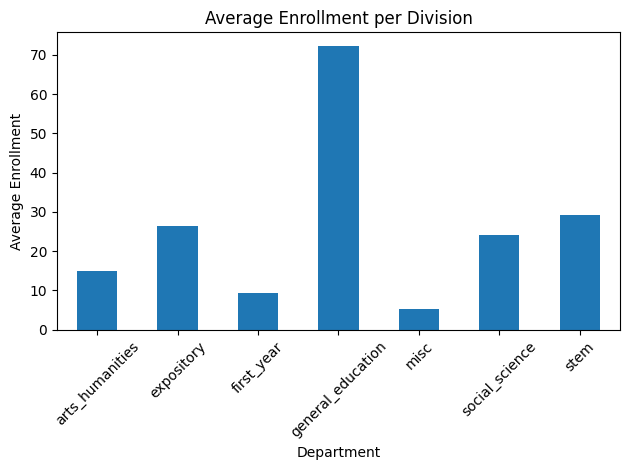

In [9]:
# Plot the average enrollment per department as a bar chart
average_enrollment.plot(kind='bar', x='division', y='enrollment', legend=False)

# Set the title and labels
plt.title('Average Enrollment per Division')
plt.xlabel('Department')
plt.ylabel('Average Enrollment')
plt.xticks(rotation=45)  # Rotate the x-axis labels to show them better

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

Text(0, 0.5, 'Total Enrollment')

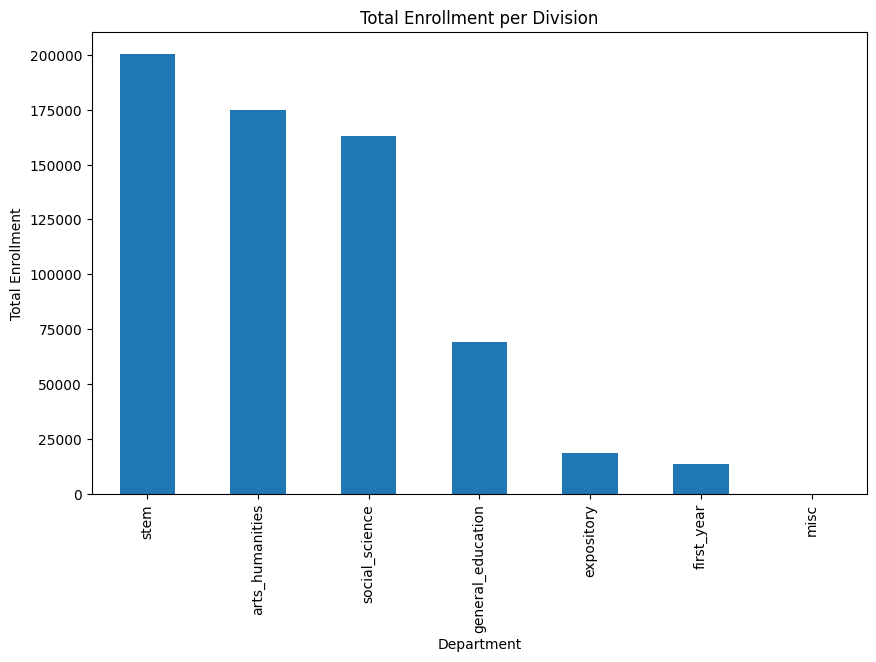

In [10]:
total_enrollment = data_cleaned.groupby('division')['enrollment'].sum().sort_values(ascending=False)

# Plotting the total enrollment per department as a bar chart
total_enrollment.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Total Enrollment per Division')
plt.xlabel('Department')
plt.ylabel('Total Enrollment')

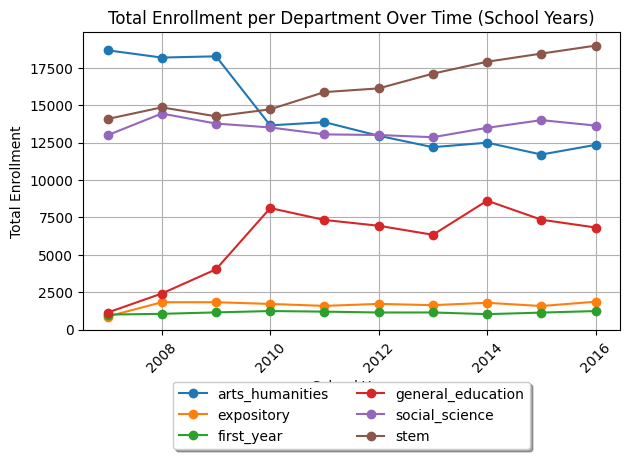

In [11]:
# Filter out 'misc' department and the years 2005 and 2017
filtered_df = data_cleaned[(data_cleaned['division'] != 'misc') & (data_cleaned['year'] > 2006) & (data_cleaned['year'] < 2017)]

# Group by department and school_year and sum enrollment
grouped_df_filtered = filtered_df.groupby(['division', 'year']).agg({'enrollment': 'sum'}).reset_index()

# Pivot the DataFrame for easier plotting
pivot_df_filtered = grouped_df_filtered.pivot(index='year', columns='division', values='enrollment')

# Plotting
pivot_df_filtered.plot(kind='line', marker='o')
plt.title('Total Enrollment per Department Over Time (School Years)')
plt.xlabel('School Year')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.tight_layout()
plt.show()

In [13]:
data_cleaned.loc[(data_cleaned['enrollment'] > 20) & 
            (data_cleaned['division'] == 'expository') & 
            (data_cleaned['year'].isin([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])), 'enrollment'] = 20

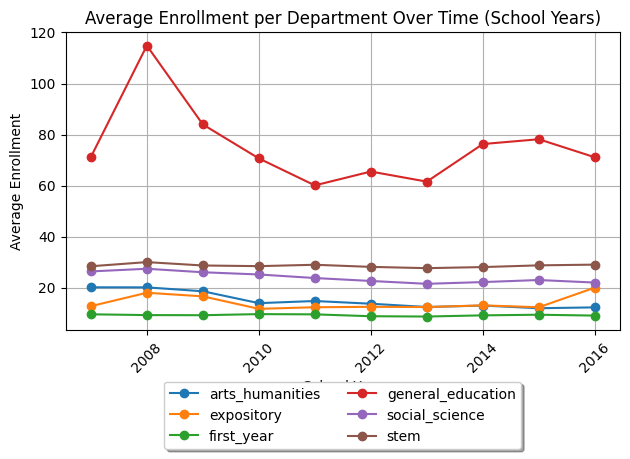

In [14]:
# Filter out 'misc' department and the years 2005 and 2017
filtered_df = data_cleaned[(data_cleaned['division'] != 'misc') & (data_cleaned['year'] > 2006) & (data_cleaned['year'] < 2017)]

# Group by department and school_year and sum enrollment
grouped_df_filtered = filtered_df.groupby(['division', 'year']).agg({'enrollment': 'mean'}).reset_index()

# Pivot the DataFrame for easier plotting
pivot_df_filtered = grouped_df_filtered.pivot(index='year', columns='division', values='enrollment')

# Plotting
pivot_df_filtered.plot(kind='line', marker='o')
plt.title('Average Enrollment per Department Over Time (School Years)')
plt.xlabel('School Year')
plt.ylabel('Average Enrollment')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.tight_layout()
plt.show()

In [15]:
# Drop all classes with enrollment below 5 (outliers)

In [16]:
df_copy_drop5 = data_cleaned[(data_cleaned['enrollment'] > 5) & (data_cleaned['division'] != 'misc')]

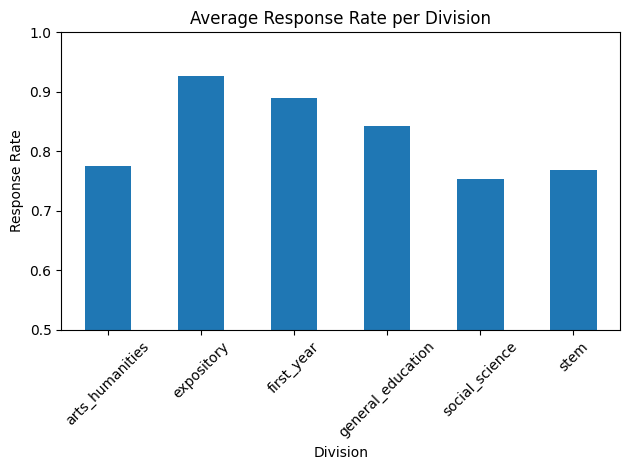

In [17]:
average_rr = df_copy_drop5.groupby('division')['response_rate'].mean().reset_index()

# Plot the average enrollment per department as a bar chart
average_rr.plot(kind='bar', x='division', y='response_rate', legend=False)

# Set the title and labels
plt.title('Average Response Rate per Division')
plt.xlabel('Division')
plt.ylabel('Response Rate')
plt.ylim(0.5, 1)
plt.xticks(rotation=45)  # Rotate the x-axis labels to show them better

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

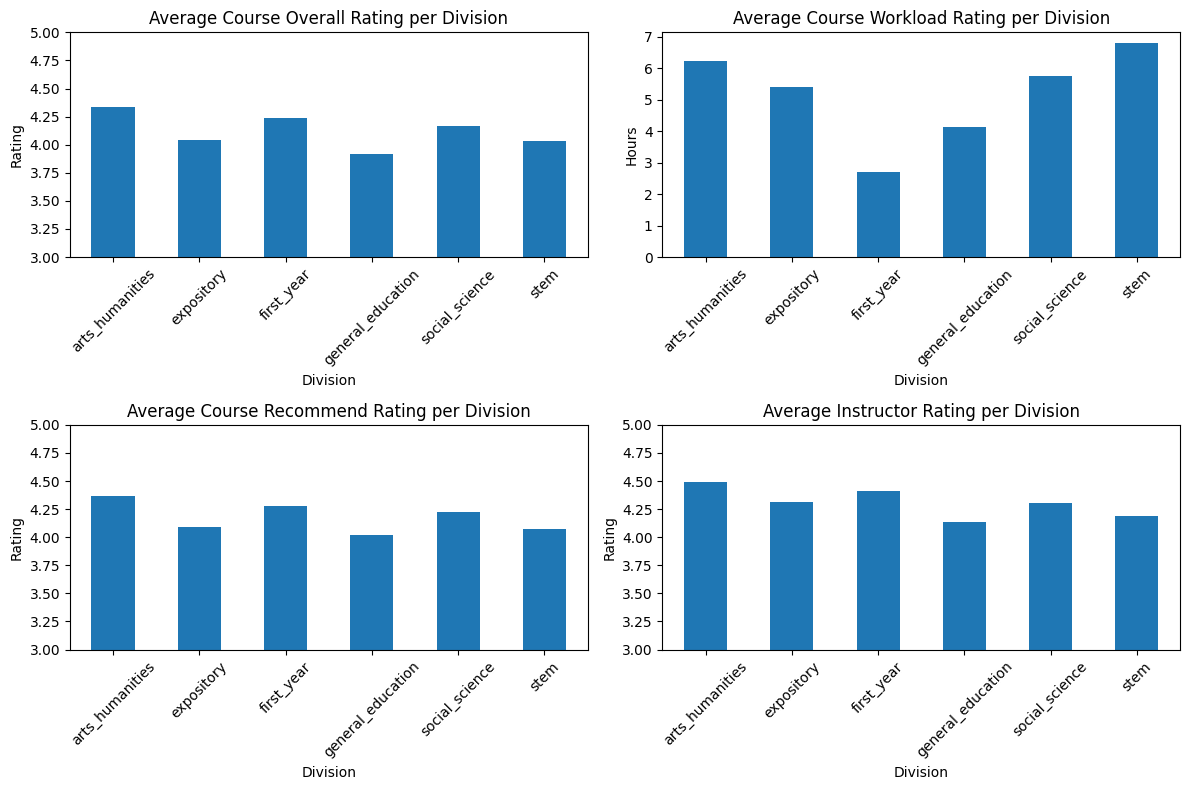

In [18]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First plot
average_cor = df_copy_drop5.groupby('division')['Course_Overall_Rating'].mean().reset_index()
average_cor.plot(kind='bar', x='division', y='Course_Overall_Rating', legend=False, ax=axs[0, 0])
axs[0, 0].set_title('Average Course Overall Rating per Division')
axs[0, 0].set_xlabel('Division')
axs[0, 0].set_ylabel('Rating')
axs[0, 0].set_ylim(3, 5)
axs[0, 0].tick_params(axis='x', rotation=45)

# Second plot
average_cwr = df_copy_drop5.groupby('division')['Course_Workload_Rating'].mean().reset_index()
average_cwr.plot(kind='bar', x='division', y='Course_Workload_Rating', legend=False, ax=axs[0, 1])
axs[0, 1].set_title('Average Course Workload Rating per Division')
axs[0, 1].set_xlabel('Division')
axs[0, 1].set_ylabel('Hours')
axs[0, 1].tick_params(axis='x', rotation=45)

# Third plot
average_crr = df_copy_drop5.groupby('division')['Course_Recommend_Rating'].mean().reset_index()
average_crr.plot(kind='bar', x='division', y='Course_Recommend_Rating', legend=False, ax=axs[1, 0])
axs[1, 0].set_title('Average Course Recommend Rating per Division')
axs[1, 0].set_xlabel('Division')
axs[1, 0].set_ylabel('Rating')
axs[1, 0].set_ylim(3, 5)
axs[1, 0].tick_params(axis='x', rotation=45)

# Fourth plot
average_ior = df_copy_drop5.groupby('division')['Instructor_Overall_Rating'].mean().reset_index()
average_ior.plot(kind='bar', x='division', y='Instructor_Overall_Rating', legend=False, ax=axs[1, 1])
axs[1, 1].set_title('Average Instructor Rating per Division')
axs[1, 1].set_xlabel('Division')
axs[1, 1].set_ylabel('Rating')
axs[1, 1].set_ylim(3, 5)
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [19]:
df_copy_drop5 = df_copy_drop5.reset_index(drop=True)

# Select only the columns you're interested in
columns = ['Course_Overall_Rating', 'Course_Workload_Rating', 'Course_Recommend_Rating', 'Instructor_Overall_Rating', 'enrollment', 'division']

# Create a pairplot using Seaborn
sns.pairplot(df_copy_drop5[columns], hue = "division")

# Show the plot
plt.show()

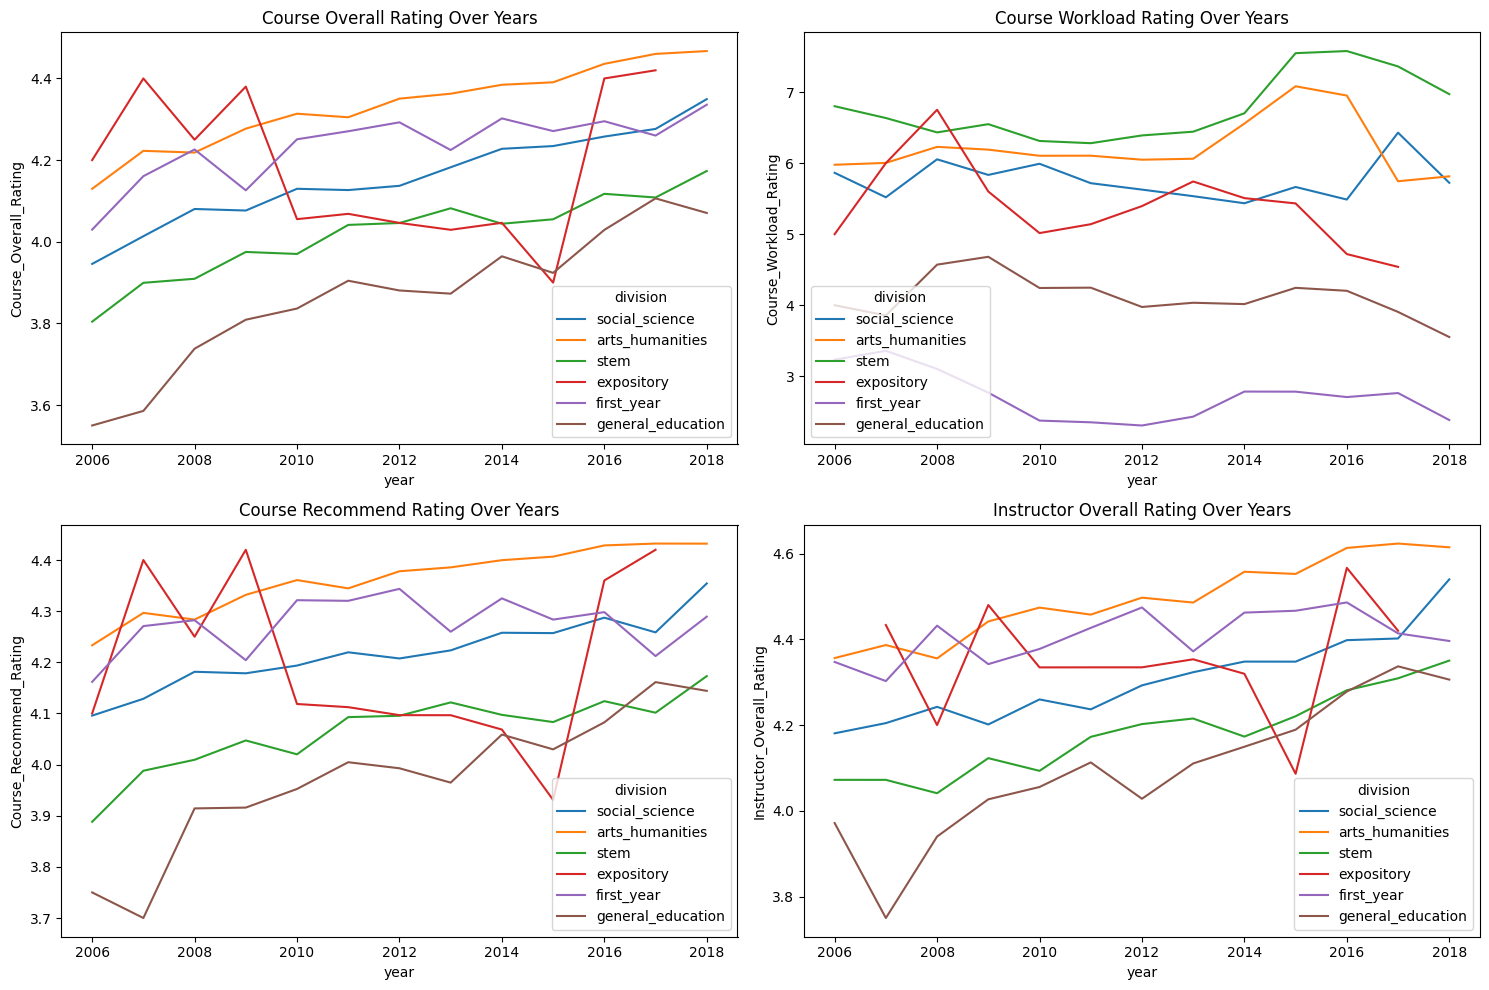

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Assuming the year column is named 'year'
# Replace 'df' with the name of your DataFrame

# Plot 1: Course_Overall_Rating over years
sns.lineplot(data=df_copy_drop5, x='year', y='Course_Overall_Rating', hue='division', ax=axs[0, 0], errorbar = None)
axs[0, 0].set_title('Course Overall Rating Over Years')

# Plot 2: Course_Workload_Rating over years
sns.lineplot(data=df_copy_drop5, x='year', y='Course_Workload_Rating', hue='division', ax=axs[0, 1], errorbar = None)
axs[0, 1].set_title('Course Workload Rating Over Years')

# Plot 3: Course_Recommend_Rating over years
sns.lineplot(data=df_copy_drop5, x='year', y='Course_Recommend_Rating', hue='division', ax=axs[1, 0], errorbar = None)
axs[1, 0].set_title('Course Recommend Rating Over Years')

# Plot 4: Instructor_Overall_Rating over years
sns.lineplot(data=df_copy_drop5, x='year', y='Instructor_Overall_Rating', hue='division', ax=axs[1, 1], errorbar = None)
axs[1, 1].set_title('Instructor Overall Rating Over Years')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

# Step 5: Begin Imputing

In [ ]:
# TODO: Add indicator and ensure right df being used
# Impute missing values for numerical columns with median
num_imputer = SimpleImputer(strategy='median')  
data_cleaned[numerical_columns] = num_imputer.fit_transform(data_cleaned[numerical_columns])

# Impute missing values for categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_columns] = cat_imputer.fit_transform(data_cleaned[categorical_columns])

# Step 6: Train-test split

In [ ]:
# Convert the 'year' column back to integers (after imputation it was converted to float)
data_cleaned['year'] = data_cleaned['year'].astype('int64')

# Split the data into training and test sets
train_data = data_cleaned[(data_cleaned['year'] >= 2006) & (data_cleaned['year'] <= 2016)]
test_data = data_cleaned[(data_cleaned['year'] == 2017) | (data_cleaned['year'] == 2018)]

# Check the shape of the train and test sets
train_shape = train_data.shape
test_shape = test_data.shape

train_shape, test_shape

((24691, 58), (3707, 58))

In [ ]:
# Define the features and target variable for the training data
X_train = train_data.drop('enrollment', axis=1)  # Features
y_train = train_data['enrollment']  # Target variable

In [ ]:
# Define categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('year')  # We exclude 'year' since it's not a predictive feature

# TODO: Check pipelines
# Create the preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Adding scaler to numerical features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncode categorical features
])

# Combine preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Step 7: Create the model

In [ ]:
# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Split the training data again into training and validation sets
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model (the Random Forest Regressor) on the training subset
model.fit(X_train_sub, y_train_sub)

# Predict on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate the root mean squared error (RMSE) on the validation set
rmse_valid = mean_squared_error(y_valid, y_pred_valid, squared=False)

rmse_valid

KeyboardInterrupt: 